<a href="https://colab.research.google.com/github/RazvanGolan/Faculty-3rd-year/blob/main/bia/lab4/exercises4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import os
from graphviz import Source
from sklearn.tree import export_graphviz
from sklearn import datasets
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

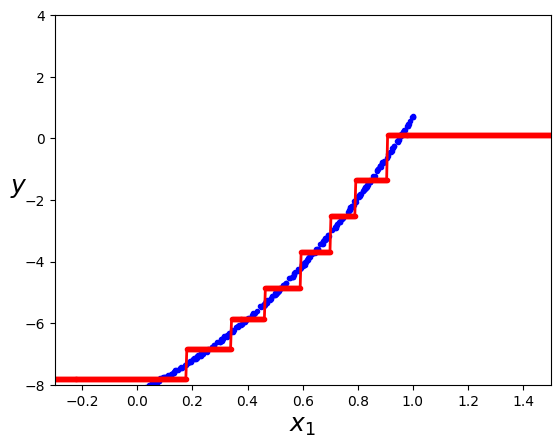

In [9]:
# exercise 1

X = np.random.rand(350, 1)
y = (X + 1.2)**3 - 10 + np.random.rand(350,1)/10

max_depth = 3
min_samples_leaf = 5

deep_tree_clf = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf, max_depth=max_depth)
deep_tree_clf.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[-0.3, 1.5, -8, 4]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plot_regression_predictions(deep_tree_clf, X, y)

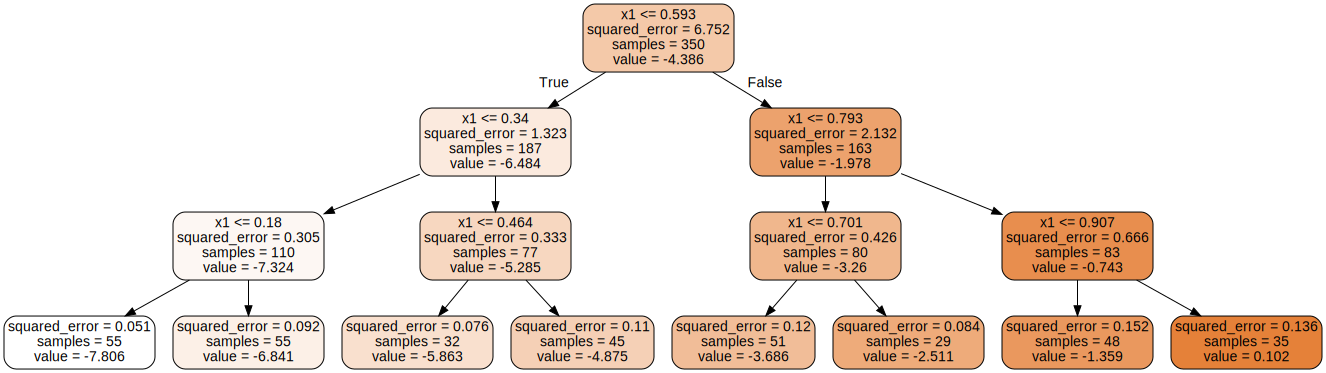

In [14]:

export_graphviz(
        deep_tree_clf,
        out_file=os.path.join(".", "regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(".", "regression_tree.dot"))

In [25]:
# exercise 2

digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.15)

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=200,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.9518518518518518


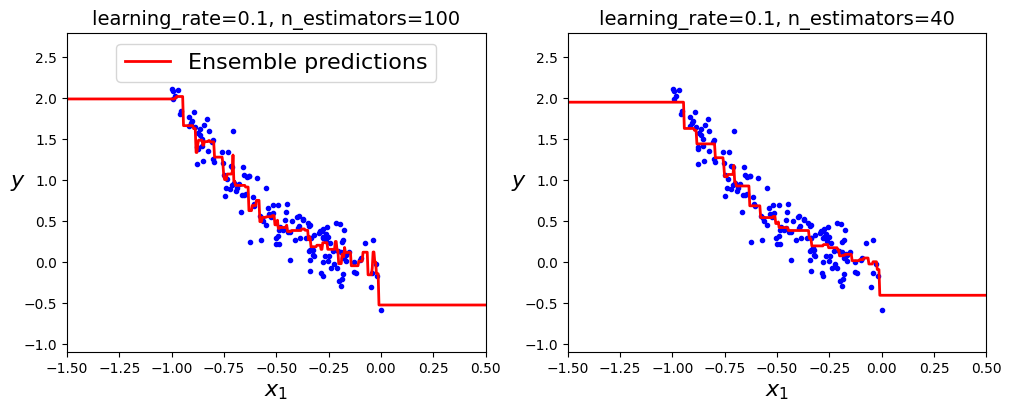

In [49]:
# exercise 3

X = np.random.rand(160, 1) - 1
y = 2*X[:, 0]**2 + 0.2*np.random.randn(160)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2017)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=100, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_test, y_pred)
          for y_pred in gbrt.staged_predict(X_test)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), constrained_layout=True)

plt.sca(axes[0])
plot_predictions([gbrt], X, y, axes=[-1.5, 0.5, -1.1, 2.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_best], X, y, axes=[-1.5, 0.5, -1.1, 2.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_best.learning_rate, gbrt_best.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()
